#**Linear Regression using Gradient Descent**

### `SGD(Stochastic gradient descent)`

* Select a data point in the graph 
* Calculate derivative of sum of square residual wrt to `intercept (b)` and `slope (m)`
* Put the random value of the `intercept (b)` and `slope (m)` in the equation 
* Then multiply learning rate with a value we get , that will give us new `intercept (b)` and new `slope (m)`.
* Now keep computing weights such that after each iteration MSE is keep decreasing and slope is also decreasing or descent at global minima where derivative of slope becomes zero.  

Explanation of image : 
<br/>

#### Plot of `Cost function or Loss function` Vs `Weight`

[<img src="https://miro.medium.com/max/1005/1*_6TVU8yGpXNYDkkpOfnJ6Q.png" width="400px"/>](https://miro.medium.com/max/1005/1*_6TVU8yGpXNYDkkpOfnJ6Q.png)

#### Equation plot

[<img src="https://qph.fs.quoracdn.net/main-qimg-be81c03a171e6489d83a028876401610" width="400px"/>](https://qph.fs.quoracdn.net/main-qimg-be81c03a171e6489d83a028876401610)



---
Importing the required packages


---



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import random
from sklearn.linear_model import SGDRegressor   

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [5]:
housing_data = california_housing.fetch_california_housing()

In [6]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
df[['MedInc', 'Target']].describe()

,MedInc,Target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


**Pre-Processing**

Notice that 75% of the data has price less than 2.65, but maximum price go as high as 5. Thus we should remove the extremely expensive houses which might prone noise.

In [0]:
df = df[df.Target < 5]

In [9]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [0]:
x = df.MedInc
y = df.Target

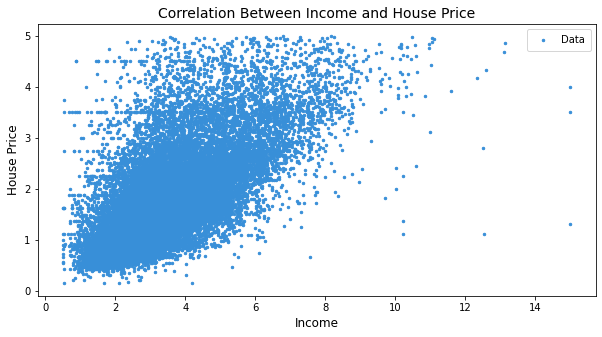

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(x,y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def gradient_descent(X, y, lr, epoch):
    
    m, b = 0.1, 0.1 # parameters
    mse = [] 
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)         ## f(x) = (Observed - predicted)
    
        # Update m and b
        # we have to take derivative a function w.r.t b and m 
        # function is sum of square residual f(x) = (Y - (m*x+b))^2
        # MSE = sum of square residual / N

        m -= lr * (-2 * X.dot(f).sum() / N)       ## Multiply a derivative with learning rate (lr)
        b -= lr * (-2 * f.sum() / N)
        mse.append(mean_squared_error(y, (m*X + b)))  
        print('> \t epoch=%d, lrate=%.3f, MSE = %.3f' % (_, lr, mean_squared_error(y, (m*X + b))))
      
    
    return m, b, mse

In [23]:
m, b, mse = gradient_descent(x, y, lr=0.01, epoch=100)

> 	 epoch=0, lrate=0.010, MSE = 1.581
> 	 epoch=1, lrate=0.010, MSE = 1.009
> 	 epoch=2, lrate=0.010, MSE = 0.757
> 	 epoch=3, lrate=0.010, MSE = 0.646
> 	 epoch=4, lrate=0.010, MSE = 0.598
> 	 epoch=5, lrate=0.010, MSE = 0.576
> 	 epoch=6, lrate=0.010, MSE = 0.567
> 	 epoch=7, lrate=0.010, MSE = 0.562
> 	 epoch=8, lrate=0.010, MSE = 0.560
> 	 epoch=9, lrate=0.010, MSE = 0.560
> 	 epoch=10, lrate=0.010, MSE = 0.559
> 	 epoch=11, lrate=0.010, MSE = 0.559
> 	 epoch=12, lrate=0.010, MSE = 0.559
> 	 epoch=13, lrate=0.010, MSE = 0.559
> 	 epoch=14, lrate=0.010, MSE = 0.559
> 	 epoch=15, lrate=0.010, MSE = 0.559
> 	 epoch=16, lrate=0.010, MSE = 0.559
> 	 epoch=17, lrate=0.010, MSE = 0.558
> 	 epoch=18, lrate=0.010, MSE = 0.558
> 	 epoch=19, lrate=0.010, MSE = 0.558
> 	 epoch=20, lrate=0.010, MSE = 0.558
> 	 epoch=21, lrate=0.010, MSE = 0.558
> 	 epoch=22, lrate=0.010, MSE = 0.558
> 	 epoch=23, lrate=0.010, MSE = 0.558
> 	 epoch=24, lrate=0.010, MSE = 0.558
> 	 epoch=25, lrate=0.010, MSE = 0.

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.5546937005203618


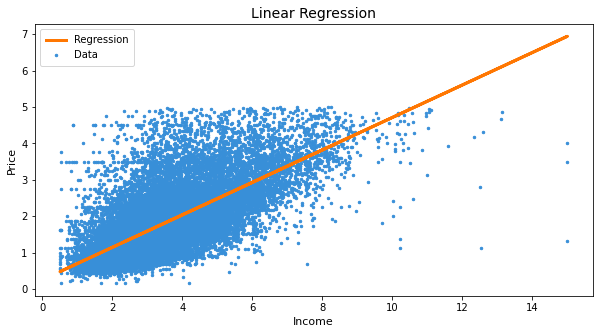

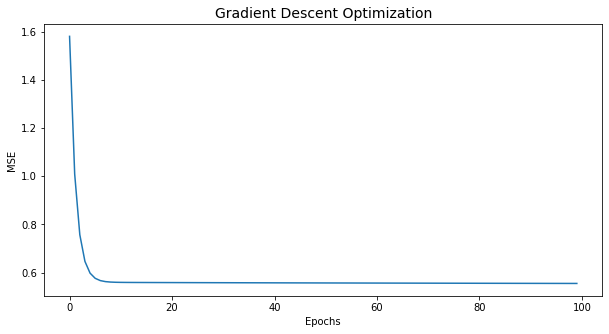

In [24]:
y_pred = m*x + b

print("MSE:",mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(x, y, label='Data', c='#388fd8', s=6)
plt.plot(x, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()



plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

### Hope you guys like it :)